In [113]:
# imports
import pandas as pd
import numpy as np
from label_utils import *
from ModelTester import ModelTester
from sklearn.metrics import confusion_matrix

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data

In [70]:
data = pd.read_csv("merged_data_ver_1.1.csv", index_col=0)
data.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,league,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribbling,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribbling,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.73,3.40,4.2,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
1,1,1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.83,3.30,3.8,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
2,2,1,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
3,2,2,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,NaN,NaN,NaN,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2
4,4,0,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,3

In [71]:
data = process_data(data)

In [72]:
x_train, y_train, x_test, y_test, bet_train, bet_test = split_data_split_bet_agency(data)
x_train.head()

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
10872,-0.122081,0,-1,-0.215351,0,-1,-0.124373,0,0.020237,0,0.264604,1,-1,0.066267,0,-0.310802,0,0.403732,1,1,-0.121011,0,-1,-0.297636,-1,-1,0.045991,0,-0.146348,0,0.264597,1,-1,-0.341973,-1,-0.311819,0,0.176136,0,1,0.666667,0.333333,0.666667,0.333333,0.4,0.4,0.4,0.4,0.3,0.2,0.6,0.2,0.40,0.20,0.60,0.25
11599,-0.205415,0,-1,0.034649,0,1,-0.293864,0,-0.313097,0,-0.080224,0,1,-0.239855,0,-0.102469,0,-0.050813,0,-1,0.128989,0,-1,-0.130970,0,1,-0.038755,0,-0.313015,0,0.178390,0,1,-0.035850,0,-0.103486,0,-0.051137,0,-1,0.666667,0.333333,0.666667,0.000000,0.4,0.6,0.6,0.2,0.3,0.5,0.4,0.2,0.35,0.30,0.40,0.15
9601,0.177919,0,0,-0.098684,0,1,0.079017,0,-0.063097,0,-0.045741,0,1,-0.076590,0,-0.081635,0,0.062823,0,-1,0.162322,0,0,0.352364,1,1,-0.191297,0,0.153652,0,0.023218,0,1,0.004966,0,0.104848,0,-0.005682,0,-1,0.333333,0.333333,0.333333,0.000000,0.2,0.2,0.6,0.0,0.2,0.2,0.5,0.1,0.35,0.20,0.45,0.20
10085,0.094585,0,0,-0.098684,0,1,0.197661,0,0.120237,0,-0.304362,0,1,0.168308,0,0.189198,0,0.085550,0,-1,0.345655,1,-1,0.119030,0,1,0.418872,1,0.003652,0,0.109424,0,1,0.290680,0,0.459014,1,-0.051137,0,-1,0.333333,0.333333,0.666667,0.000000,0.4,0.2,0.6,0.0,0.3,0.3,0.6,0.1,0.30,0.35,0.60,0.15
10550,-0.122081,0,-1,-0.298684,-1,1,-0.293864,0,-0.146430,0,0.178397,0,1,-0.341896,-1,0.418365,1,0.290096,0,1,0.295655,1,-1,-0.297636,-1,-1,0.130736,0,0.103652,0,0.264597,1,-1,0.168231,0,-0.415986,-1,0.403409,1,1,0.333333,0.000000,1.000000,0.000000,0.2,0.4,1.0,0.0,0.3,0.2,0.8,0.2,0.35,0.20,0.65,0.20


In [73]:
x_train.values.shape
columns = x_train.values.shape[1]
columns

56

## First neural model start here

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 56)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5700      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 303       
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total para

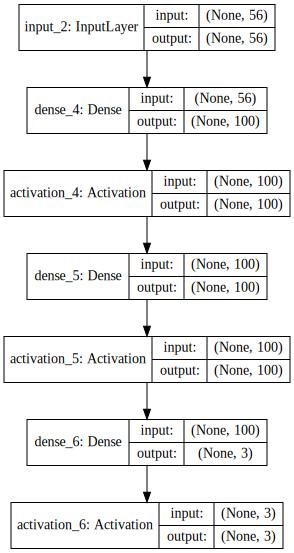

In [74]:
from keras.models import Model
from keras.layers import Input, Activation, Flatten, Dense, Concatenate
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot as pyd
from keras.utils.np_utils import to_categorical
keras.utils.vis_utils.pydot = pyd

# We first need to define the sequence of dependencies (the computational graph)
inputs = Input(shape=(columns,))
d0 = Dense(units=100)(inputs)
a0 = Activation('relu')(d0)
d1 = Dense(units=100)(a0)
a1 = Activation('relu')(d1)
d2 = Dense(units=3)(a1)

# Concatenate the convolutional features and the vector input
output = Activation('softmax')(d2)

# define a model with two inputs
model = Model(inputs=inputs, outputs=output)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [75]:
history = model.fit(x_train, to_categorical(y_train+1), batch_size=32, epochs=20, validation_split=0.04)

Train on 19705 samples, validate on 822 samples
Epoch 1/20
19705/19705 [==============================] - 1s 63us/step - loss: 0.2086 - acc: 0.4761 - val_loss: 0.2093 - val_acc: 0.4416
Epoch 2/20
19705/19705 [==============================] - 1s 53us/step - loss: 0.2010 - acc: 0.5092 - val_loss: 0.2046 - val_acc: 0.4781
Epoch 3/20
19705/19705 [==============================] - 1s 53us/step - loss: 0.1985 - acc: 0.5157 - val_loss: 0.2030 - val_acc: 0.4927
Epoch 4/20
19705/19705 [==============================] - 1s 66us/step - loss: 0.1969 - acc: 0.5188 - val_loss: 0.2012 - val_acc: 0.4964
Epoch 5/20
19705/19705 [==============================] - 1s 55us/step - loss: 0.1960 - acc: 0.5231 - val_loss: 0.2011 - val_acc: 0.5024
Epoch 6/20
19705/19705 [==============================] - 1s 52us/step - loss: 0.1953 - acc: 0.5260 - val_loss: 0.1999 - val_acc: 0.4951
Epoch 7/20
19705/19705 [==============================] - 1s 71us/step - loss: 0.1948 - acc: 0.5260 - val_loss: 0.2001 - val_acc: 

### Let's have a look into labels of the Train, Test sets and Predictions

In [76]:
np.argmax(model.predict(x_test[:30]), axis=1)-1, y_test.values[:30]

(array([ 0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([ 0, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
         1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1]))

In [216]:
modelTester = ModelTester(model, x_train, y_train, x_test, y_test, bet_train, bet_test)

In [217]:
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Home win count:", (y_train==-1).sum())
print("Draw count:", (y_train==0).sum())
print("Away win count:", (y_train==1).sum())

Y train
Unique train labels: [-1  0  1]
Home win count: 9420
Draw count: 5217
Away win count: 5890


In [218]:
print("Train Prediction")
predictions = np.argmax(model.predict(x_train), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Train Prediction
Unique train labels: [-1  0  1]
Home win count: 12912
Draw count: 1946
Away win count: 5669


In [219]:
modelTester.get_train_confusion_matrix()

,pred home,pred draw,pred away
true home,7428,595,1397
true draw,2969,850,1398
true away,2515,501,2874


In [220]:
print("Y test")
print("Unique train labels:", np.unique(y_test.values))
print("Home win count:", (y_test==-1).sum())
print("Draw count:", (y_test==0).sum())
print("Away win count:", (y_test==1).sum())

Y test
Unique train labels: [-1  0  1]
Home win count: 2354
Draw count: 1300
Away win count: 1478


In [221]:
print("Test Prediction")
predictions = np.argmax(model.predict(x_test), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Test Prediction
Unique train labels: [-1  0  1]
Home win count: 3184
Draw count: 475
Away win count: 1473


In [222]:
modelTester.get_test_confusion_matrix()

,pred home,pred draw,pred away
true home,1801,177,376
true draw,770,171,359
true away,613,127,738


# TODO! Add saliency mapping here

## Betting time...

### Outcome when bet on home team
Just a sanity check. Should not see high/any yields. Betting agencies cannot allow this to work.

In [223]:
agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']

In [224]:
print("Test set size", y_test.shape)

Test set size (5132,)


In [225]:
modelTester.predict_home_wins_only_profit(data="train")

Agency B365, 	win amount: -358.02
Agency BW, 	win amount: -672.98
Agency IW, 	win amount: -1066.66
Agency LB, 	win amount: -809.56
Agency WH, 	win amount: -522.30
Agency SJ, 	win amount: 413.09
Agency VC, 	win amount: -158.62
Agency GB, 	win amount: 570.80
Agency BS, 	win amount: 566.73


In [226]:
modelTester.predict_home_wins_only_profit(data="train")

Agency B365, 	win amount: -358.02
Agency BW, 	win amount: -672.98
Agency IW, 	win amount: -1066.66
Agency LB, 	win amount: -809.56
Agency WH, 	win amount: -522.30
Agency SJ, 	win amount: 413.09
Agency VC, 	win amount: -158.62
Agency GB, 	win amount: 570.80
Agency BS, 	win amount: 566.73


In [227]:
modelTester.predict_draw_only_profit(data="train")

Agency B365, 	win amount: -1510.41
Agency BW, 	win amount: -1904.15
Agency IW, 	win amount: -2422.72
Agency LB, 	win amount: -2037.35
Agency WH, 	win amount: -2249.13
Agency SJ, 	win amount: -1612.36
Agency VC, 	win amount: -1259.90
Agency GB, 	win amount: -1998.52
Agency BS, 	win amount: -1916.66


In [228]:
modelTester.predict_away_wins_only_profit(data="train")

Agency B365, 	win amount: -897.43
Agency BW, 	win amount: -1635.65
Agency IW, 	win amount: -2278.48
Agency LB, 	win amount: -1693.84
Agency WH, 	win amount: -1433.88
Agency SJ, 	win amount: 1035.52
Agency VC, 	win amount: -519.67
Agency GB, 	win amount: 1080.36
Agency BS, 	win amount: 1278.58


### Bet on every match
Always bet on the predicted winner.

In [229]:
for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    r = odds * predictions_categorical * to_categorical(y_test+1)
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # Let's say we bet 1€. then our profit(or loss) would be = earnings€ - 1€
    r -= 1
    
    print("Agency %s, \twin amount: %.2f" % (agency, r.sum()))

Agency B365, 	win amount: 679.12
Agency BW, 	win amount: 583.86
Agency IW, 	win amount: 520.04
Agency LB, 	win amount: 565.22
Agency WH, 	win amount: 622.56
Agency SJ, 	win amount: 1382.12
Agency VC, 	win amount: 742.79
Agency GB, 	win amount: 1600.24
Agency BS, 	win amount: 1613.11


In [230]:
modelTester.always_bet_predicted_winner_profit()

Agency B365, 	win amount: 679.12
Agency BW, 	win amount: 583.86
Agency IW, 	win amount: 520.04
Agency LB, 	win amount: 565.22
Agency WH, 	win amount: 622.56
Agency SJ, 	win amount: 1382.12
Agency VC, 	win amount: 742.79
Agency GB, 	win amount: 1600.24
Agency BS, 	win amount: 1613.11


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > SOMETHING.

In [231]:
SOMETHING = 1

for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # r holds betting results. 0 indicates loss, value otherwise shows the win amount
    bet = odds * predictions_categorical * predictions_shape_3x1 
    bet = bet > SOMETHING
    r = odds * predictions_categorical * to_categorical(y_test+1)
    r -= 1
    # Set win/lose amount to 0 on matched it didn't bet
    r[np.invert(bet)] = 0
    # Take max value of win, draw, other win. 
    r = r.values.max(axis=1)
    # print(odds.values[:5])
    # print((predictions_categorical*predictions_shape_3x1)[:5])
    # print(bet[:5])
    # print(odds[:5])
    # print(to_categorical(y_test+1)[:5])
    # print(r[:5])
    skip_percentage = (r==0).sum() / r.shape[0] * 100   
    print("Agency %s, \twin amount: %.2f. Didn't bet on %.2f%% of matches" % (agency, r.sum(), skip_percentage))

Agency B365, 	win amount: 2301.41. Didn't bet on 72.06% of matches
Agency BW, 	win amount: 2197.36. Didn't bet on 72.58% of matches
Agency IW, 	win amount: 2097.60. Didn't bet on 72.66% of matches
Agency LB, 	win amount: 2163.79. Didn't bet on 72.62% of matches
Agency WH, 	win amount: 2234.50. Didn't bet on 71.80% of matches
Agency SJ, 	win amount: 3168.02. Didn't bet on 66.17% of matches
Agency VC, 	win amount: 2402.13. Didn't bet on 71.16% of matches
Agency GB, 	win amount: 3422.02. Didn't bet on 63.66% of matches
Agency BS, 	win amount: 3442.89. Didn't bet on 63.56% of matches


In [232]:
predictions_shape_3x1

array([[0.35135293, 0.42669103, 0.22195603],
       [0.4738969 , 0.30881828, 0.21728484],
       [0.3747834 , 0.3855391 , 0.23967746],
       ...,
       [0.47570556, 0.28671384, 0.23758061],
       [0.45787087, 0.30989707, 0.23223217],
       [0.8095897 , 0.11163303, 0.0787773 ]], dtype=float32)

In [248]:
modelTester.bet_predicted_winner_with_threshold_profit("test")

Agency B365, 	win amount: 2301.41. Didn't bet on 72.06% of matches
Agency BW, 	win amount: 2197.36. Didn't bet on 72.58% of matches
Agency IW, 	win amount: 2097.60. Didn't bet on 72.66% of matches
Agency LB, 	win amount: 2163.79. Didn't bet on 72.62% of matches
Agency WH, 	win amount: 2234.50. Didn't bet on 71.80% of matches
Agency SJ, 	win amount: 3168.02. Didn't bet on 66.17% of matches
Agency VC, 	win amount: 2402.13. Didn't bet on 71.16% of matches
Agency GB, 	win amount: 3422.02. Didn't bet on 63.66% of matches
Agency BS, 	win amount: 3442.89. Didn't bet on 63.56% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > SOMETHING]

In [249]:
SOMETHING = 2.5 # Set to 0, to bet on all matches

for agency in agencies:
    odds = pd.concat([bet_test[agency+'H'], bet_test[agency+'D'], bet_test[agency+'A']], axis=1)
    # Expected earning value. Basically expects that our NN predicts real match outcomes
    expected = (odds * predictions_shape_3x1).values
    
    # Threshold matches, when we'd actually would make a bet. If expected yield is too low, it'll pass
    bet = np.max(expected > SOMETHING, axis=1)
    
    # Take the highest yield of [home win, draw, other win]
    r = np.argmax(expected, axis=1) 
    
    # Calculate wins/losses according to real match results
    r = to_categorical(r) * to_categorical(y_test+1)
    r -= 1 # subtract our input bet
    
    # Calculate earnings
    r = r.max(axis=1) # Take max value of win, draw, other win. 
    r[np.invert(bet)] = 0 # Set win/lose amount to 0 on matched it didn't bet
    
    skip_percentage = (bet==0).sum() / bet.shape[0] * 100   
    print("Agency %s, \twin amount: %.2f. Didn't bet on %.2f%% of matches" % (agency, r.sum(), skip_percentage))

Agency B365, 	win amount: -67.00. Didn't bet on 98.13% of matches
Agency BW, 	win amount: -33.00. Didn't bet on 98.91% of matches
Agency IW, 	win amount: -20.00. Didn't bet on 99.38% of matches
Agency LB, 	win amount: -46.00. Didn't bet on 98.66% of matches
Agency WH, 	win amount: -45.00. Didn't bet on 98.66% of matches
Agency SJ, 	win amount: -86.00. Didn't bet on 96.40% of matches
Agency VC, 	win amount: -77.00. Didn't bet on 97.84% of matches
Agency GB, 	win amount: -55.00. Didn't bet on 96.90% of matches
Agency BS, 	win amount: -72.00. Didn't bet on 96.40% of matches


In [252]:
modelTester.predict_on_highest_return(threshold=2)

Agency B365, 	win amount: -216.00. Didn't bet on 93.71% of matches
Agency BW, 	win amount: -143.00. Didn't bet on 95.60% of matches
Agency IW, 	win amount: -102.00. Didn't bet on 96.86% of matches
Agency LB, 	win amount: -149.00. Didn't bet on 95.54% of matches
Agency WH, 	win amount: -171.00. Didn't bet on 95.01% of matches
Agency SJ, 	win amount: -281.00. Didn't bet on 89.81% of matches
Agency VC, 	win amount: -236.00. Didn't bet on 93.22% of matches
Agency GB, 	win amount: -243.00. Didn't bet on 89.71% of matches
Agency BS, 	win amount: -259.00. Didn't bet on 89.34% of matches
